In [1]:
import cv2
import numpy as np
import os
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
import torchvision
import tensorflow

In [2]:
dataset = fo.Dataset.from_images_dir("test set")
print(dataset)

 100% |███████████████████| 27/27 [25.7ms elapsed, 0s remaining, 1.1K samples/s]      
Name:        2023.07.15.21.12.37
Media type:  image
Num samples: 27
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)


In [3]:
fo.launch_app(dataset)

Dataset:          2023.07.15.21.12.37
Media type:       image
Num samples:      27
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [4]:
model = foz.load_zoo_model('resnet50-imagenet-torch')
embeddings = dataset.compute_embeddings(model)
results = fob.compute_visualization(dataset, embeddings=embeddings, seed=51)

C:\Users\julio\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\julio\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 100% |███████████████████| 27/27 [1.0m elapsed, 0s remaining, 0.6 samples/s]     
Generating visualization...
UMAP(random_state=51, verbose=True)
Sat Jul 15 21:14:31 2023 Construct fuzzy simplicial set
Sat Jul 15 21:14:31 2023 Finding Nearest Neighbors
Sat Jul 15 21:14:33 2023 Finished Nearest Neighbor Search
Sat Jul 15 21:14:36 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jul 15 21:14:36 2023 Finished embedding


In [6]:
session = fo.launch_app(dataset)
plot = results.visualize()
session.plots.attach(plot)
plot.show(height=512)

FigureWidget({
    'data': [{'customdata': array(['64b2a9556e5459414be119ac', '64b2a9556e5459414be119ad',
    …

In [7]:
embeddings

array([[5.72993696e-01, 1.63217168e-02, 9.54169687e-03, ...,
        3.40627669e-03, 1.15751103e-03, 8.80290382e-03],
       [4.17883486e-01, 1.57085568e-01, 1.62384324e-02, ...,
        3.02371420e-02, 6.70817718e-02, 1.66217208e-01],
       [4.20025319e-01, 1.62741154e-01, 1.62816346e-02, ...,
        3.50060053e-02, 5.99317811e-02, 1.72730491e-01],
       ...,
       [6.13763630e-01, 1.69824839e+00, 2.88156886e-02, ...,
        5.92063218e-02, 6.17620945e-02, 1.71964228e+00],
       [7.02516496e-01, 9.75565016e-01, 3.85941602e-02, ...,
        2.32284561e-01, 1.47652581e-01, 5.78331172e-01],
       [2.92017043e-01, 1.35497856e+00, 5.38158491e-02, ...,
        4.54270422e-01, 3.45218927e-01, 3.41901183e-01]])

In [91]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    if x.mean() <= 20:
        x *= 2
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    df = pd.DataFrame(preds[0]).T
    return df

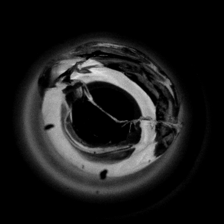

In [127]:
img = cv2.imread('cropped/4983.png')
img = image.array_to_img(img)
img = img.resize((224, 224))
img
# img = np.expand_dims(img, axis=0)

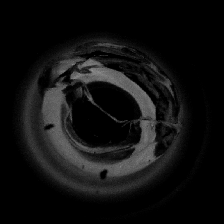

In [126]:
image.load_img('cropped/4983.png',target_size=(224, 224))

<BarContainer object of 24 artists>

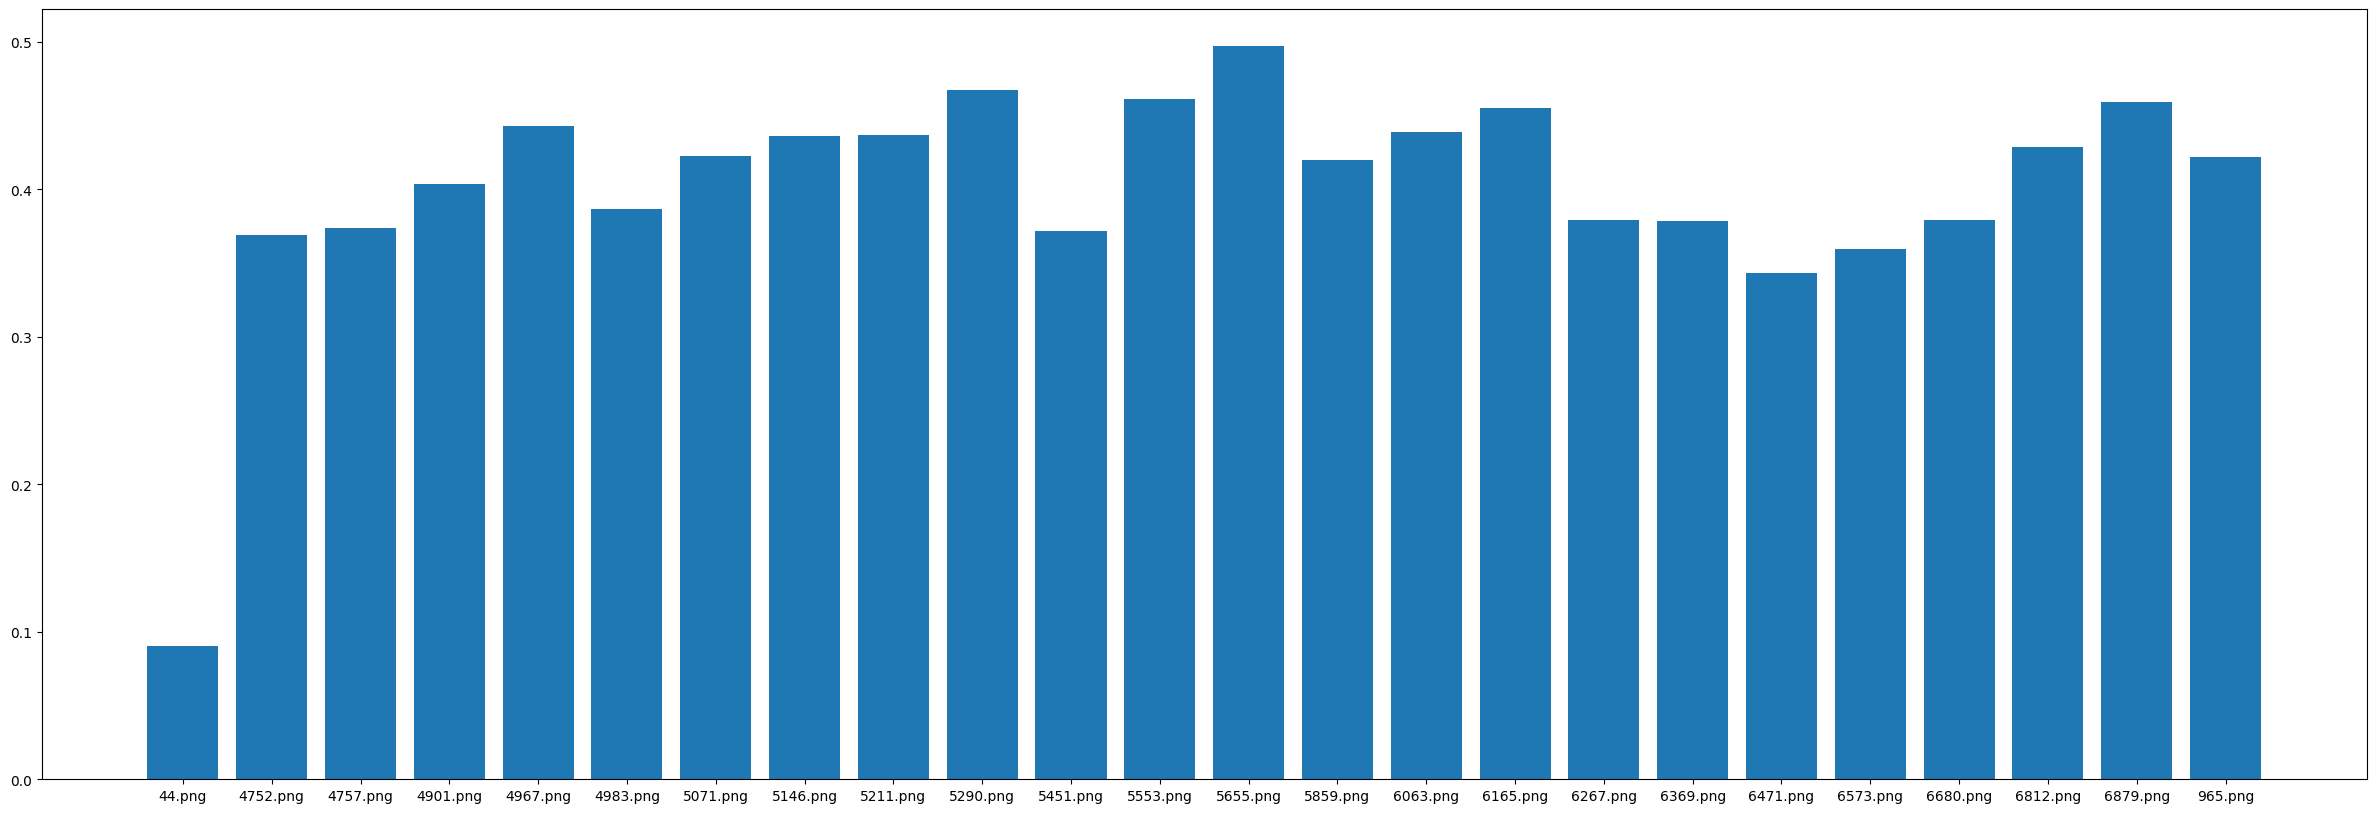

In [46]:
df_embedding.index = df_embedding.img
df = df_embedding.drop("img",axis=1)
plt.figure(figsize=(30,10))
plt.bar(df.index,df.mean(axis=1))

In [46]:
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
# cosine_similarity_df = pd.DataFrame(cosine_similarity(embedding_df.drop('image',axis=1)))

array([0.7941947], dtype=float32)

In [23]:
curr_index = embedding_df[embedding_df['image']=="965.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = embedding_df.iloc[index]['image']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)

6063.png 0.886
5146.png 0.881
5859.png 0.879
5451.png 0.878
4757.png 0.877
4752.png 0.877
6369.png 0.872
6471.png 0.869
5211.png 0.869
5290.png 0.868
5071.png 0.864
6165.png 0.85
5655.png 0.847
6812.png 0.847
6680.png 0.846
6267.png 0.845
5553.png 0.833
4967.png 0.794
6879.png 0.788
6573.png 0.774
4901.png 0.746
4983.png 0.706
44.png 0.463


In [24]:
curr_index = embedding_df[embedding_df['image']=="4967.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = embedding_df.iloc[index]['image']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)

4983.png 0.925
6267.png 0.921
5655.png 0.888
6573.png 0.887
6680.png 0.883
5553.png 0.881
4752.png 0.879
6063.png 0.877
5146.png 0.872
6879.png 0.872
4901.png 0.87
4757.png 0.869
5290.png 0.865
6812.png 0.836
5211.png 0.835
6471.png 0.826
5071.png 0.826
6165.png 0.8
965.png 0.794
6369.png 0.78
5859.png 0.776
5451.png 0.747
44.png 0.456


In [116]:
GO = np.load("GO.npy")
NG = np.load("NG.npy")

4.7324625


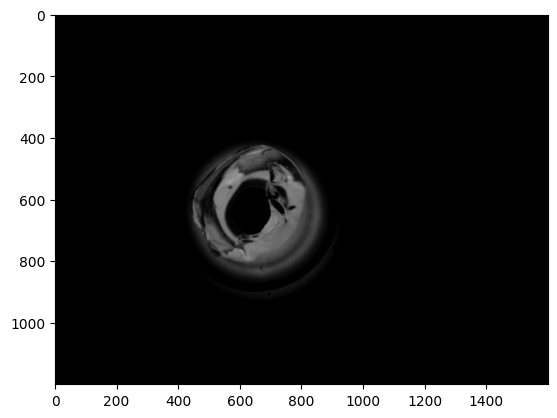

In [89]:
img = cv2.imread('test_set/6573.png')
# gray_pic = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting the image into grayscale
# r, threshold = cv2.threshold(gray_pic, 125, 255, cv2.THRESH_OTSU) #converting the image into grayscale using the histogram method
plt.imshow(img)
print(img.mean())

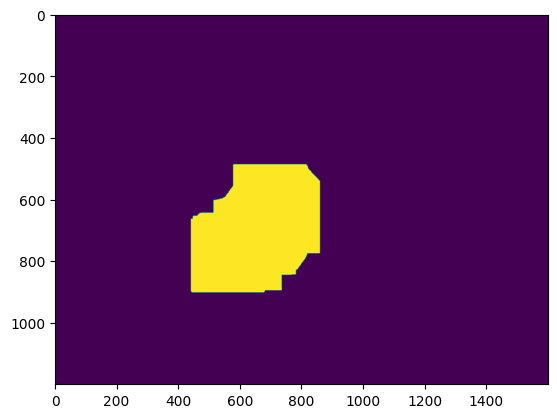

In [90]:
blur = cv2.GaussianBlur(img, (7, 7), 1)
canny = cv2.Canny(blur, 100, 300)  
kernel = np.ones((40, 40), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=6)
plt.imshow(dilated)

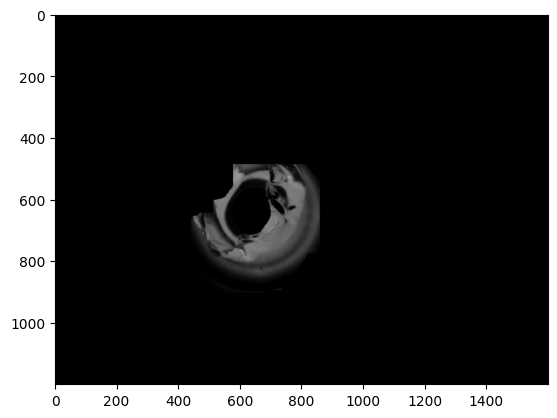

In [91]:
result = cv2.bitwise_and(img, img, mask=dilated)
plt.imshow(result)

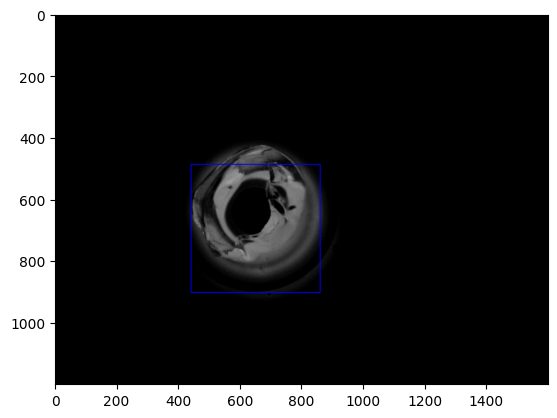

In [92]:
cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
x, y, w, h = cv2.boundingRect(cnt[0])
cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
plt.imshow(img)

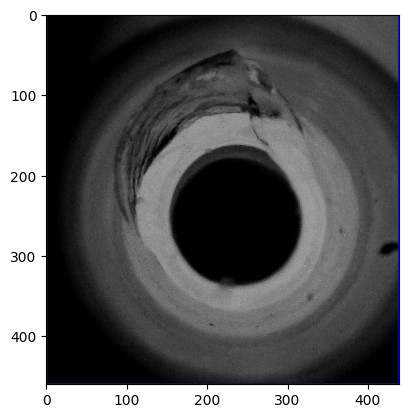

In [60]:
plt.imshow(img[y:y+h, x:x+w])

In [114]:
def crop_img(path):
    img = cv2.imread(path)
    if img.mean() < 5:
        new_img = img*2
    else:
        new_img = img
    
    blur = cv2.GaussianBlur(new_img, (7, 7), 1)
    canny = cv2.Canny(blur, 100, 300)  
    kernel = np.ones((40, 40), np.uint8)
    dilated = cv2.dilate(canny, kernel, iterations=6)
    cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(cnt) > 0:
        x, y, w, h = cv2.boundingRect(cnt[0])
        img = img[y:y+h, x:x+w]
    return img

43.09026290165531


True

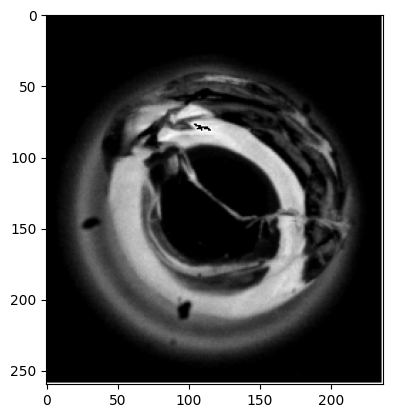

In [233]:
# image = crop_img('test_set/4901.png')
img = cv2.imread("NG.png")
print((img*2).mean())
plt.imshow(img*2)
cv2.imwrite("cropped/NG2.png",img*2)

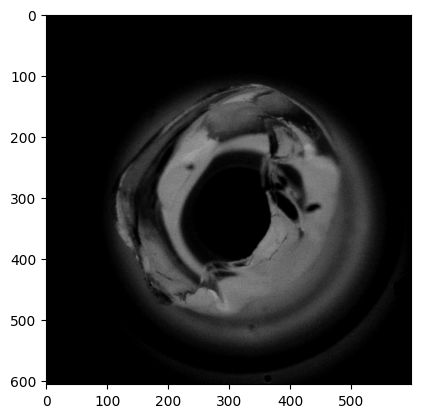

In [111]:
image = crop_img('test_set/6573.png')
plt.imshow(image)

In [115]:
path = "test_set"
cropped_path = "cropped/"
for img in os.listdir(path):
    cropped = crop_img(os.path.join(path,img))
    cv2.imwrite(os.path.join(cropped_path,img), cropped)

In [137]:
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
#     if x.mean() <= 20:
#         x *= 2
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    df = pd.DataFrame(preds[0]).T
    return df

In [138]:
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
return_image_embedding(model,"cropped/5859.png")

1/1 [==============================] - 3s 3s/step


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.463158,0.502662,0.006434,0.684074,3.272176,0.708528,0.0,0.466448,0.185999,0.234949,...,0.204033,0.98935,1.621356,0.150255,0.717827,0.020744,0.090447,0.0,0.11896,0.0


In [139]:
cropped_path = "cropped/"
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
df_embedding = pd.DataFrame()
for img in os.listdir(cropped_path):
    df = return_image_embedding(model,cropped_path+img)
    df['img'] = img
    df_embedding = pd.concat([df_embedding,df],ignore_index=True)
df_embedding

1/1 [==============================] - 0s 306ms/step


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,img
0,0.000000,0.000000,0.000000,0.000000,0.008758,0.000000,0.000000,0.019484,0.000000,0.000000,...,0.000000,0.356595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.png
1,1.347400,0.166870,0.020122,0.368254,1.588105,0.130507,0.000000,0.305701,0.234065,0.000000,...,1.185320,3.048522,0.000000,0.094387,0.000000,0.049304,0.094807,0.238943,0.000000,4752.png
2,1.702075,0.117688,0.012205,0.465575,1.321271,0.129221,0.000000,0.451505,0.329609,0.000000,...,0.675810,3.420927,0.003688,0.583918,0.017516,0.082350,0.054445,0.502700,0.000000,4757.png
3,2.939090,0.099929,0.115924,0.424248,1.317543,0.146369,0.000000,0.010366,0.081123,0.008547,...,0.138892,4.126823,0.605717,0.109945,0.499287,0.123701,0.230786,0.528307,0.000000,4901.png
4,0.993851,0.637334,0.046723,1.453533,3.520296,0.167363,0.000000,0.549260,0.238208,0.000000,...,0.185295,2.865804,0.431263,0.106688,0.295177,0.000099,0.143755,0.854777,0.000000,4967.png
5,1.499374,0.492180,0.000000,1.206019,2.820037,0.030281,0.000000,0.791724,0.104628,0.000000,...,0.200112,3.072485,0.247013,0.113344,0.243536,0.064377,0.101521,0.995753,0.008322,4983.png
6,0.677143,1.682237,0.106998,1.873917,0.935522,0.643832,0.002166,1.051786,1.111997,0.047344,...,0.297882,5.031527,0.208153,1.928367,0.447706,0.000000,0.000000,0.089967,0.013633,5071.png
7,0.788127,0.757789,0.002578,0.850815,1.093986,0.697026,0.000000,0.978176,0.909232,0.000000,...,0.392943,3.011875,0.075109,0.604488,0.000000,0.000000,0.006041,0.058901,0.000000,5146.png
8,0.491702,0.665942,0.000000,0.982248,1.094665,0.125933,0.000000,1.252745,0.704099,0.011321,...,0.528784,3.946893,0.001291,0.589185,0.000000,0.069276,0.000000,0.022977,0.000000,5211.png
9,1.401586,0.080452,0.000000,0.635051,1.825245,0.312622,0.022901,1.618061,0.586702,0.113027,...,1.054069,4.012262,0.000000,0.735664,0.000000,0.134755,0.000000,0.111065,0.000000,5290.png


In [140]:
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
cosine_similarity_df = pd.DataFrame(cosine_similarity(df_embedding.drop('img',axis=1)))

In [141]:
curr_index = df_embedding[df_embedding['img']=="965.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = df_embedding.iloc[index]['img']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)

6812.png 0.873
5290.png 0.868
6369.png 0.863
GO.png 0.859
5146.png 0.852
5211.png 0.846
5859.png 0.844
5451.png 0.84
6165.png 0.837
6471.png 0.816
5655.png 0.816
6063.png 0.811
4757.png 0.811
6267.png 0.792
6879.png 0.79
5553.png 0.788
5071.png 0.781
4752.png 0.772
6680.png 0.768
4983.png 0.742
6573.png 0.729
4967.png 0.713
NG.png 0.704


In [117]:
curr_index = df_embedding[df_embedding['img']=="NG2.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(25+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = df_embedding.iloc[index]['img']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)
    
# Thres = 84

4752.png 1.0
4757.png 1.0
4901.png 1.0
4967.png 1.0
4983.png 1.0
5071.png 1.0
5146.png 1.0
5211.png 1.0
5290.png 1.0
5451.png 1.0
5553.png 1.0
5655.png 1.0
5859.png 1.0
6063.png 1.0
6165.png 1.0
6267.png 1.0
6369.png 1.0
6471.png 1.0
6573.png 1.0
6680.png 1.0
6812.png 1.0
6879.png 1.0
965.png 1.0
GO.png 1.0
NG.png 1.0


In [240]:
cropped_path = "cropped/"
for img in os.listdir(cropped_path):
    mean = cv2.imread(f"cropped/{img}").mean()
    print(img,mean)

44.png 7.1875e-05
4752.png 18.10494552353105
4757.png 17.959996155996645
4901.png 18.147463544875745
4967.png 16.675732340091592
4983.png 16.580252049855254
5071.png 46.55347096607019
5146.png 44.85438657373936
5211.png 43.8235715927373
5290.png 53.167689544555216
5451.png 71.20450905950304
5553.png 68.1527027027027
5655.png 50.52398384246403
5859.png 32.74742014742015
6063.png 50.56675397985705
6165.png 57.333853905485114
6267.png 28.508938568933193
6369.png 56.3898930375359
6471.png 27.656608237444885
6573.png 25.00942715306589
6680.png 67.57628081832488
6812.png 63.75043964512241
6879.png 63.48575248698039
965.png 81.6270386197404
GO.png 39.63871158392435
NG.png 22.625300227198963
NG2.png 43.09026290165531


In [136]:
os.remove("embedding.csv")